In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_15.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_118.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_33.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_52.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_34.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_114.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_64.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_32.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_56.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_58.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_61.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_98.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/image_110.jpeg
/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes/ima

#                                    All Required Libraries

In [75]:
import os
import time
import random
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from fastcore.all import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,recall_score, precision_score
from fastai.vision.all import load_learner
from fastai.vision.all import load_learner, PILImage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Show the distribution of images into different categories.

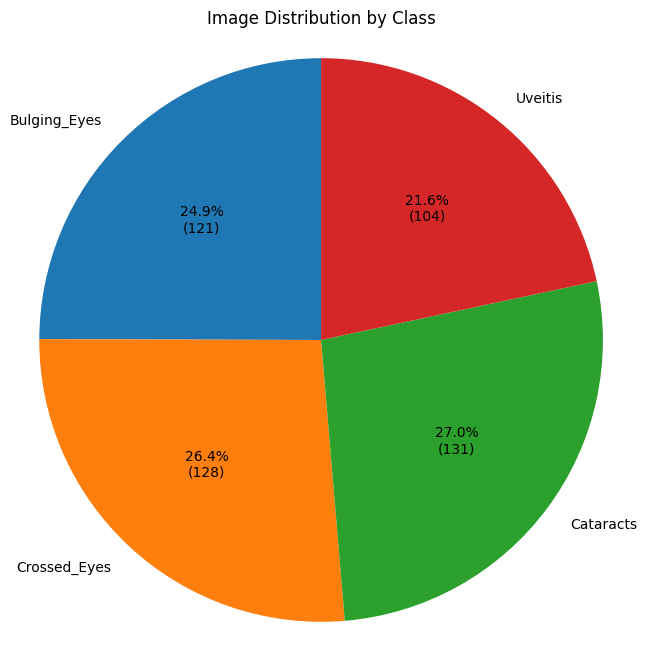

In [76]:
# Define the path to the dataset
base_dir = '/kaggle/input/eye-without-split/Eye_diseases'

# Initialize a dictionary to store the number of images per class
image_count_per_class = {}

# Loop through each class directory in the base directory
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    
    # Check if the path is a directory (class folder)
    if os.path.isdir(class_path):
        
        # Count the number of images in the class directory
        num_images = len(os.listdir(class_path))
        
        # Store the count of images in the dictionary with the class name as the key
        image_count_per_class[class_dir] = num_images

# Get the labels (class names) and sizes (image counts) for the pie chart
labels = list(image_count_per_class.keys())
sizes = list(image_count_per_class.values())

# Define a function to format the pie chart percentages with absolute values
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))  # Calculate the absolute number of images
    return f'{pct:.1f}%\n({absolute})'  # Return the percentage and absolute count as text

# Create the pie chart to show the image distribution across classes
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=90)

# Ensure the pie chart is circular
plt.axis('equal')

# Set the title of the chart
plt.title('Image Distribution by Class')

# Display the pie chart
plt.show()




# Display a sample of two images for each category visually.

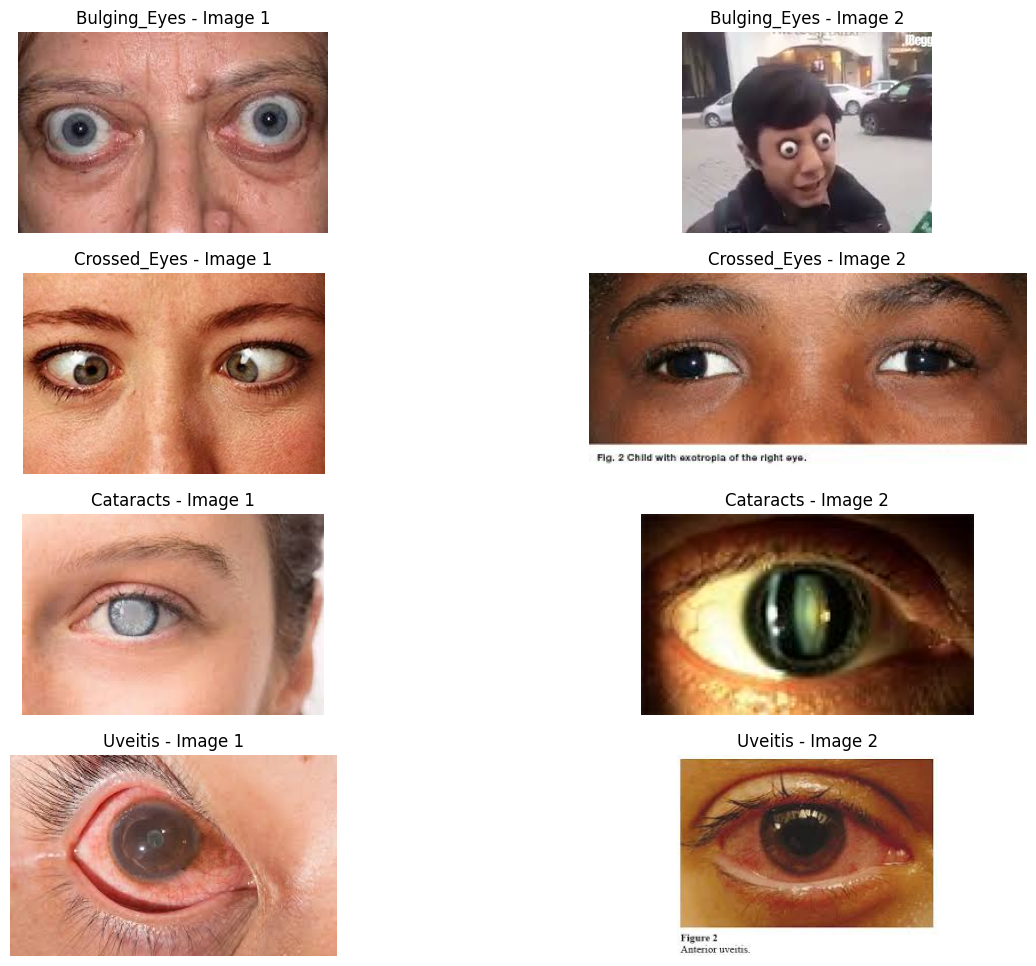

In [86]:
# Get the number of classes (folders in the base directory)
num_classes = len(os.listdir(base_dir))

# Set the size of the plot based on the number of classes
plt.figure(figsize=(15, num_classes * 3))

# Loop through each class directory in the base directory
for i, class_dir in enumerate(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_dir)
    
    # Check if the path is a directory (class folder)
    if os.path.isdir(class_path):
        
        # Randomly select 2 images from the class folder
        image_files = random.sample(os.listdir(class_path), 2)
        
        # Loop through each selected image and display it
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)
            
            # Open and display the image
            image = Image.open(image_path)
            
            # Create a subplot for each image and show it
            plt.subplot(num_classes, 2, i * 2 + j + 1) 
            plt.imshow(image)
            plt.title(f'{class_dir} - Image {j + 1}')  # Set title with class name and image index
            plt.axis('off')  # Hide axis labels

# Show the final plot with images
plt.show()



# Preparing training and validation dataset

In [78]:
# Creating a data generator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Defining the training data generator with a subset of training images
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

# Defining the validation data generator with a subset of validation images
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation' 
)

# Printing the number of images in the training and validation sets
print(f"Number of training images: {train_generator.samples}")
print(f"Number of test images: {validation_generator.samples}")


Found 389 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Number of training images: 389
Number of test images: 96


In [79]:
searches = 'Bulging_Eyes','Cataracts','Crossed_Eyes','Uveitis'
path = Path(r'/kaggle/input/eye-without-split/Eye_diseases')


In [80]:
get_items=get_image_files(path)

In [81]:
path.ls()


(#4) [Path('/kaggle/input/eye-without-split/Eye_diseases/Bulging_Eyes'),Path('/kaggle/input/eye-without-split/Eye_diseases/Crossed_Eyes'),Path('/kaggle/input/eye-without-split/Eye_diseases/Cataracts'),Path('/kaggle/input/eye-without-split/Eye_diseases/Uveitis')]

# Perform data augmentation to train the model


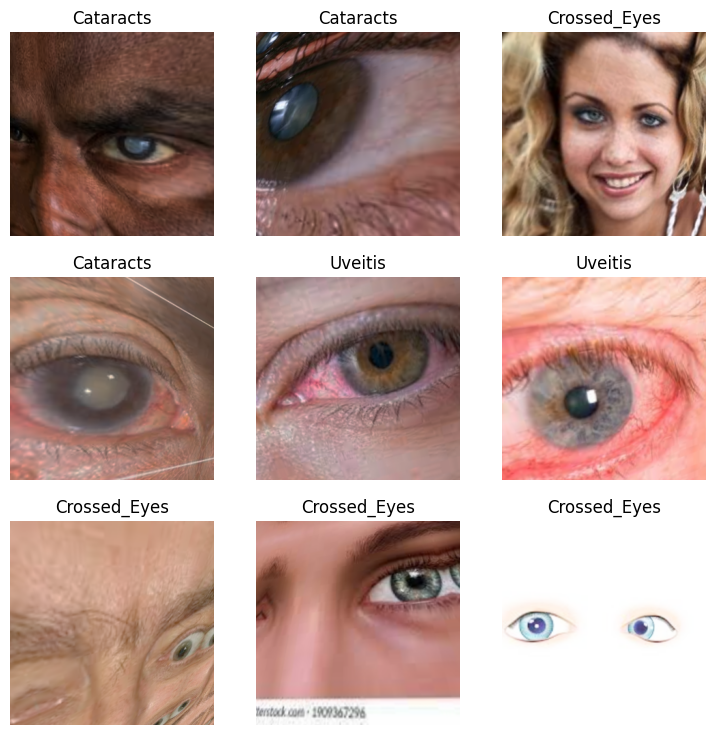

In [82]:
path = '/kaggle/input/eye-without-split/Eye_diseases'


dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  
    get_items=get_image_files,           
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  
    get_y=parent_label,                  
    item_tfms=Resize(299),               
    batch_tfms=aug_transforms(mult=2.0)  
)

# 1. Loading images and labels using `get_image_files` and `parent_label`.
# 2. Splitting the data into training and validation sets (80-20%).
# 3. Resizing images to 299x299 and applying augmentation.
dls = dblock.dataloaders(path, batch_size=16)

# Displaying a batch of images to check the data pipeline.
dls.show_batch()


In [87]:
blocks=(ImageBlock, CategoryBlock),

In [88]:
# I used 'get_image_files' to retrieve all image files from a specified directory.
# This function will return a list of paths to the images that can be used for training or validation.
get_items = get_image_files


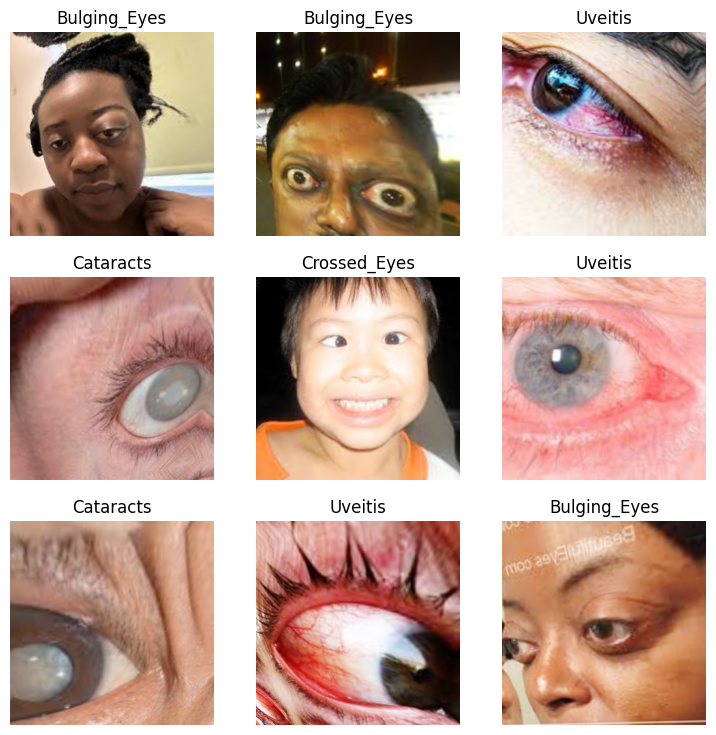

In [90]:
# I used the RandomSplitter to split my dataset into training and validation sets.
# 'valid_pct=0.2' means that 20% of my data will be used for validation and the remaining 80% for training.
# 'seed=42' ensures that the data split is reproducible, so I can get the same split each time I run the code.
# This is useful for consistency when training and evaluating the model.

splitter = RandomSplitter(valid_pct=0.2, seed=42)

# Now, I use the 'show_batch()' function to visualize a batch of images from the dataset.
# This helps me quickly inspect if the data is loaded correctly, check the labels, and ensure that the split is done properly.

dls.show_batch()


# Training a ResNet50 model on the data, with improved performance through fine-tuning

In [91]:
# I initialized the learner using the 'resnet50' architecture and the specified DataLoaders (dls)
# 'dls' contains my training and validation datasets, including images and their corresponding labels.
# The model is based on 'resnet50', which is a pre-trained model on ImageNet.
# I also included the 'accuracy' metric to track how well the model performs during training.

learn = vision_learner(dls, resnet50, metrics=accuracy)

# Explanation of the vision_learner function:
# 1. It loads the ResNet50 model pre-trained on ImageNet.
# 2. The model is then adapted to work on my specific dataset, using the images and labels in 'dls'.
# 3. The 'accuracy' metric helps me monitor the model's performance throughout the training process.

# Now, I fine-tuned the model on my dataset for 19 epochs.
# Fine-tuning involves adjusting the model's pre-trained weights to make it better suited to my task.
# During the fine-tuning process, the model first trains on my dataset with the pre-trained weights frozen (for one epoch).
# After that, all layers of the model are unfrozen, and the training continues for 18 more epochs.


learn.fine_tune(19)
# Explanation of fine_tune method:
# The fine_tune method works in two stages:
# 1. The first stage freezes the earlier layers of the pre-trained model and trains only the last layers on my data (for one epoch).
#    This step helps to adapt the model to my dataset without overfitting.
# 2. The second stage unfreezes all layers, allowing the model to adjust all weights for my specific task during the remaining epochs.
#    This way, the model fine-tunes its knowledge while leveraging the general features learned from ImageNet.
# I chose this approach because fine-tuning is an effective way to leverage pre-trained models, especially when my dataset might not be large enough to train from scratch.
# It's much faster and requires less data, as the model already has learned useful features from ImageNet.

# Loss curve for both training loss and validation loss

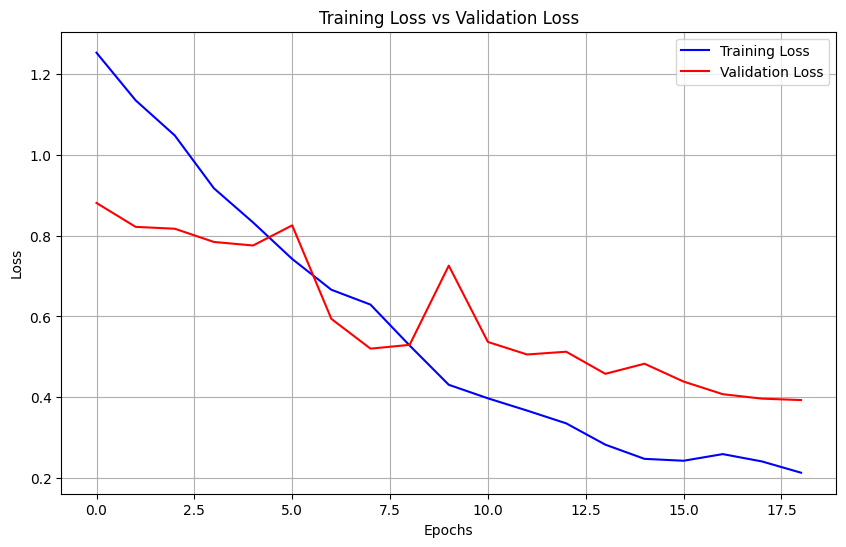

In [111]:
# Function to plot the training and validation loss curves
def plot_loss_curve(train_losses, valid_losses):
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    plt.plot(train_losses, label='Training Loss', color='blue')  # Plot training loss
    plt.plot(valid_losses, label='Validation Loss', color='red')  # Plot validation loss
    # Add title, labels, and legend to the plot
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid for better readability
    plt.show()  # Display the plot
# Call the function to plot the loss curves
plot_loss_curve(train_losses, valid_losses)


# Show model accuracy on validation set

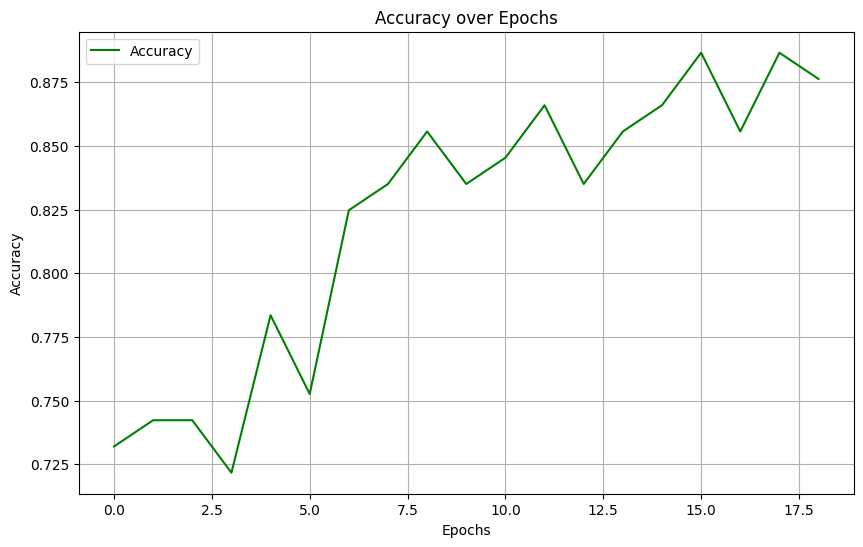

In [112]:
def plot_accuracy_curve(accuracy_values):
    # Create a figure with a specified size
    plt.figure(figsize=(10, 6))
    # Plot the accuracy values
    plt.plot(accuracy_values, label='Accuracy', color='green')
    # Add a title and labels to the axes
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    # Display the legend and grid for better readability
    plt.legend()
    plt.grid(True)
    # Show the plot
    plt.show()
# Call the function to plot the accuracy curve
plot_accuracy_curve(accuracy_values)


In [93]:
# Display the architecture and summary of the model
learn.summary()

Sequential (Input shape: 16 x 3 x 299 x 299)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 150 x 150 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 75 x 75   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     16 x 256 x 75 x 75  
Conv2d                                    16384      True      
BatchNorm2d                        

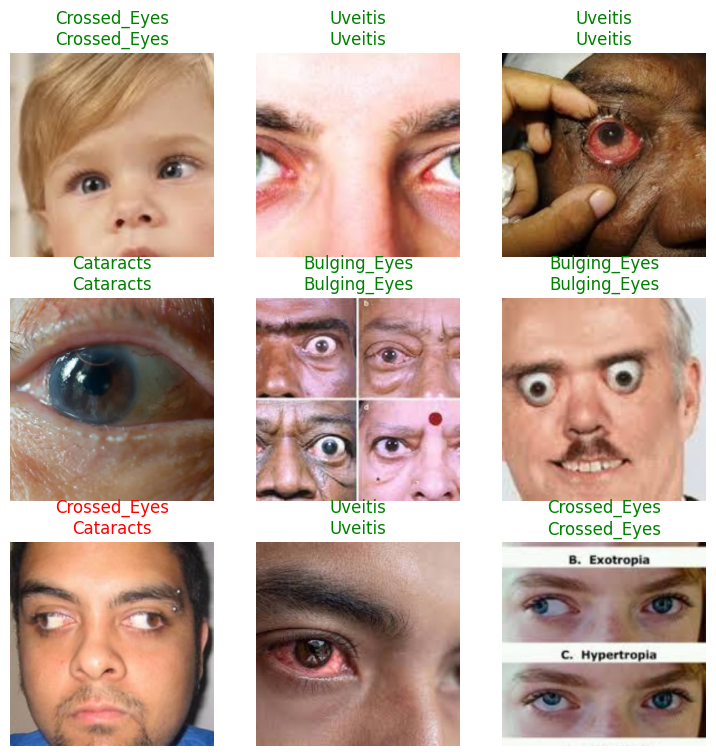

In [116]:
# Display the results of the model predictions on a batch of data
learn.show_results()

/opt/conda/lib/python3.10/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.00013182566908653826)

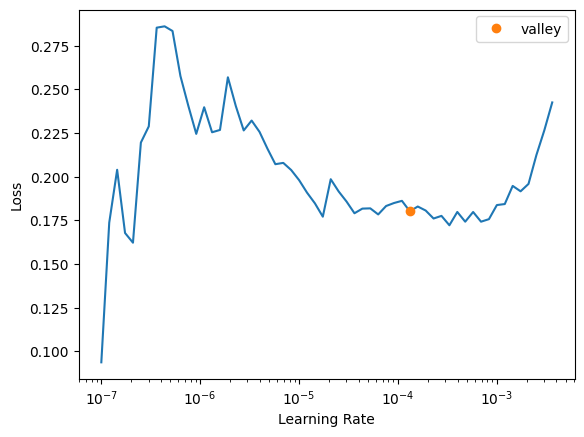

In [95]:
# Find the optimal learning rate for training the model
learn.lr_find()


In [96]:
# Create an interpretation object for the trained model to analyze its predictions
interp = ClassificationInterpretation.from_learner(learn)


In [98]:
# Get the top losses (the samples where the model made the biggest errors)
df_errors = interp.top_losses()


# Display wrong images classification

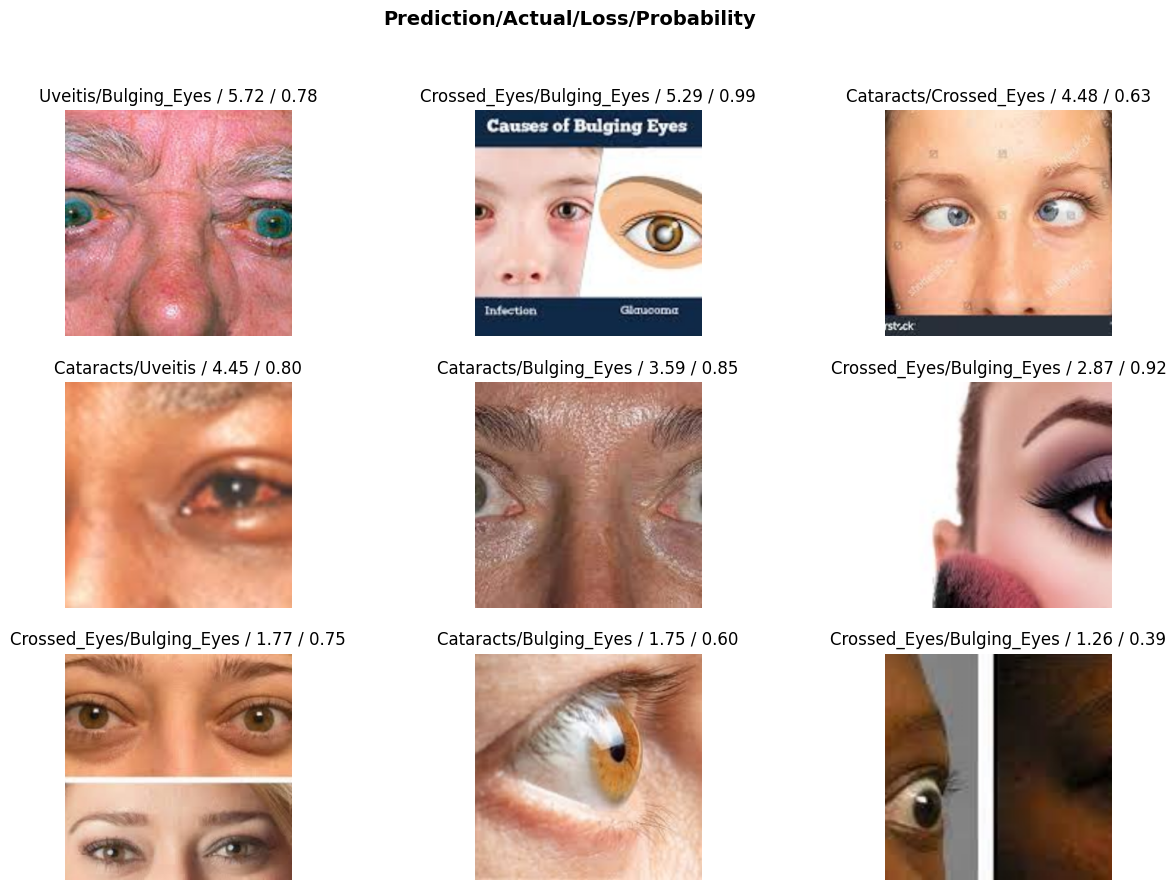

In [99]:
# Plot the top 9 losses to visualize the samples the model struggled with the most
interp.plot_top_losses(9, figsize=(15, 10))


In [100]:
# Get the top losses (samples the model struggled with the most)
df_errors = interp.top_losses() 

# Display the top loss samples
df_errors


(TensorBase([5.7178e+00, 5.2891e+00, 4.4846e+00, 4.4467e+00, 3.5935e+00,
             2.8689e+00, 1.7687e+00, 1.7514e+00, 1.2576e+00, 1.2210e+00,
             1.0935e+00, 9.5191e-01, 6.0913e-01, 4.4989e-01, 4.4394e-01,
             3.9141e-01, 2.6694e-01, 2.3722e-01, 1.7157e-01, 1.3770e-01,
             9.9040e-02, 7.1519e-02, 6.8889e-02, 6.8063e-02, 5.3099e-02,
             4.9452e-02, 4.3463e-02, 4.1431e-02, 3.8407e-02, 3.7808e-02,
             3.3907e-02, 2.7225e-02, 2.5159e-02, 1.9861e-02, 1.8588e-02,
             1.8120e-02, 1.6845e-02, 1.6561e-02, 1.6119e-02, 1.5676e-02,
             1.5555e-02, 1.4508e-02, 1.3891e-02, 1.3103e-02, 9.6698e-03,
             9.3085e-03, 7.9439e-03, 7.7653e-03, 7.3481e-03, 6.9561e-03,
             5.3266e-03, 4.7511e-03, 4.6587e-03, 4.5810e-03, 4.4413e-03,
             4.1796e-03, 4.0608e-03, 3.8793e-03, 3.5773e-03, 3.3879e-03,
             3.1317e-03, 3.0009e-03, 2.4433e-03, 2.1993e-03, 1.8525e-03,
             1.6147e-03, 1.4485e-03, 1.2964e-03, 9.

# Display confusion matrix

          Actual     Predicted
0   Crossed_Eyes  Crossed_Eyes
1   Crossed_Eyes  Crossed_Eyes
2   Bulging_Eyes  Bulging_Eyes
3   Bulging_Eyes  Crossed_Eyes
4        Uveitis       Uveitis
..           ...           ...
92     Cataracts     Cataracts
93  Crossed_Eyes     Cataracts
94  Crossed_Eyes  Crossed_Eyes
95  Bulging_Eyes  Bulging_Eyes
96       Uveitis       Uveitis

[97 rows x 2 columns]


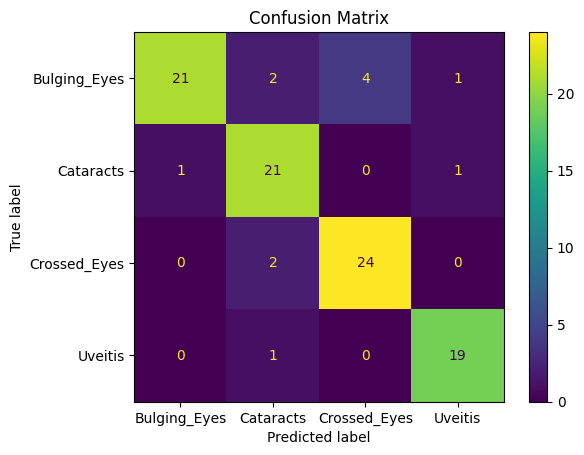

In [92]:
# Get predictions and actual labels from the model
preds, y_true, _ = learn.get_preds(with_decoded=True)
y_pred = preds.argmax(dim=1)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
# Map the label indices to the actual class names
results_df['Actual'] = results_df['Actual'].apply(lambda x: dls.vocab[x])
results_df['Predicted'] = results_df['Predicted'].apply(lambda x: dls.vocab[x])

# Print the DataFrame showing actual vs predicted labels
print(results_df)

# Generate and display the confusion matrix
cm = confusion_matrix(results_df['Actual'], results_df['Predicted'], labels=dls.vocab)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)

# Plot the confusion matrix
disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()  # Display the plot


# Calculate Model accuracy and Validation loss, F1 score, precision

In [101]:
from sklearn.metrics import classification_report

# Get the predictions and ground truths for the validation set
preds, targs = learn.get_preds()

# Convert predictions to class labels
pred_labels = preds.argmax(dim=1)

# Generate the classification report
report = classification_report(targs, pred_labels, target_names=dls.vocab, digits=4)

# Print the F1 Score, Precision, and Recall for each class
print(report)


              precision    recall  f1-score   support

Bulging_Eyes     0.9545    0.7500    0.8400        28
   Cataracts     0.8077    0.9130    0.8571        23
Crossed_Eyes     0.8571    0.9231    0.8889        26
     Uveitis     0.9048    0.9500    0.9268        20

    accuracy                         0.8763        97
   macro avg     0.8810    0.8840    0.8782        97
weighted avg     0.8834    0.8763    0.8751        97



In [102]:
# Calculate accuracy by comparing predicted values to true values
# The accuracy is the ratio of correct predictions to total predictions.

accuracy = (y_pred == y_true).sum().item() / len(y_true)

# Print accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.0f}%")


Accuracy: 88%


In [103]:
# Calculate validation loss and accuracy using the validate method
valid_loss, valid_accuracy = learn.validate()

# Print the validation loss
print(f"Validation Loss: {valid_loss:.4f}")


Validation Loss: 0.3928


In [104]:
# Calculate the recall score with weighted averaging
rc = recall_score(y_true, y_pred, average='weighted')

# Print the recall score
print(f"Recall score is : {rc:.2f}")


Recall score is : 0.88


In [105]:
# Calculate the Precision using the precision_score function from scikit-learn.
# Precision is a metric that measures how many of the predicted positive instances were actually positive.
# The 'weighted' average computes the precision for each class while considering the size of each class.

precision = precision_score(y_true, y_pred, average='weighted')

# Print the Precision value with four decimal places
print(f"Precision: {precision:.2f}")


Precision: 0.88


In [106]:
# The F1 Score is a metric used to evaluate the performance of a model in multi-class classification,
# balancing both Precision and Recall.
# Using the 'weighted' average ensures that the F1 Score is computed for all classes 
# while taking into account the size of each class.

f1 = f1_score(y_true, y_pred, average='weighted')

# Print the F1 Score with four decimal places
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.88


In [ ]:
learn.export('/kaggle/working/eye_model.pkl') 

learn = load_learner('/kaggle/working/eye_model.pkl')





# 

# Test model

In [ ]:
# Import necessary libraries
from fastai.vision.all import *
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
learn = load_learner('/kaggle/input/eyemodel/other/default/1/eye_model.pkl')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = PILImage.create(img_path)  # Load image using PIL
    return img

# Function to predict the class of the image
def predict(img_path, class_dict):
    # Load and preprocess the image
    processed_image = load_and_preprocess_image(img_path)
    
    # Get predictions from the model
    predictions = learn.predict(processed_image)
    
    # Get probability values for each class
    probs = predictions[2].numpy()
    
    # Get class names from the model
    class_names = learn.dls.vocab
    
    # Find the class with the highest probability
    max_prob_idx = np.argmax(probs)
    predicted_class = class_names[max_prob_idx]
    max_prob = probs[max_prob_idx]
    
    # Display the image using matplotlib
    plt.imshow(np.array(processed_image)) 
    plt.axis('off')  # Hide axes
    plt.title(f"Predicted Class: {predicted_class} ({max_prob:.4f})", fontsize=14)  # Add class name above the image
    plt.show()

    # Print probability for each class
    for i, prob in enumerate(probs):
        print(f'"{class_names[i]}": {prob:.4f}')
        
    # Return the predictions as a dictionary of class names and their probabilities
    return {class_names[i]: probs[i] for i in range(len(class_names))}

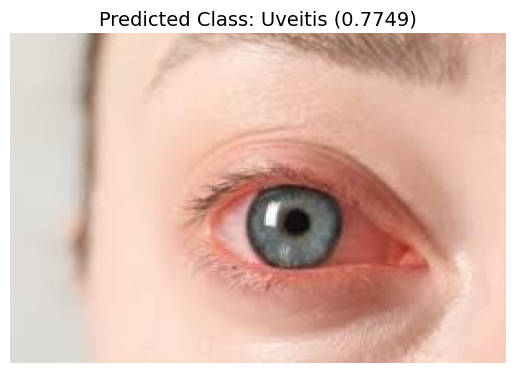

"Bulging_Eyes": 0.0500
"Cataracts": 0.0150
"Crossed_Eyes": 0.1600
"Uveitis": 0.7749


In [123]:
# Call the function to predict the class of a specific image
image_path = '/kaggle/input/imagetest/case0.jfif' 
predictions = predict(image_path, class_dict=None)

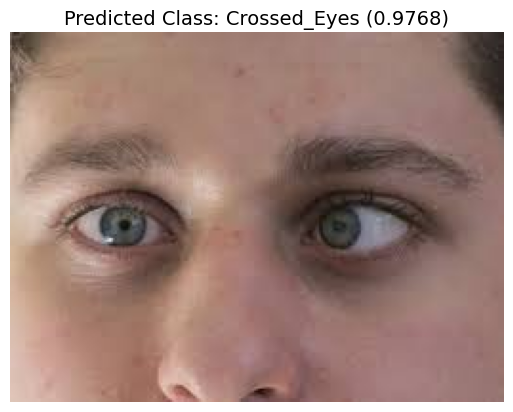

"Bulging_Eyes": 0.0001
"Cataracts": 0.0230
"Crossed_Eyes": 0.9768
"Uveitis": 0.0000


In [125]:
# Call the function to predict the class of a specific image
image_path = '/kaggle/input/imagetest/case01.jfif' 
predictions = predict(image_path, class_dict=None)

In [124]:
# Call the function to predict the class of a specific image
image_path = '/kaggle/input/imagetest/case1.jfif' 
predictions = predict(image_path, class_dict=None)

"Bulging_Eyes": 0.0000
"Cataracts": 1.0000
"Crossed_Eyes": 0.0000
"Uveitis": 0.0000


In [ ]:
import gradio as gr
from fastai.vision.all import *

# Load the trained model
learn = load_learner('eye_model.pkl')

# Function to classify the image and return results
def classify_image(image):
    # Make prediction
    pred_class, pred_idx, outputs = learn.predict(image)
    # Convert outputs to percentage confidence for each class
    confidence_scores = {str(learn.dls.vocab[i]): float(outputs[i]) * 100 for i in range(len(outputs))}

    # Find the maximum confidence score
    max_score = max(confidence_scores.values())
    
    # If the maximum score is below 60%, classify as "Normal"
    if max_score < 60:
        classified_disease = "Normal"
    else:
        classified_disease = str(pred_class)

    # Alert messages for each disease type
    alert_messages = {
        "Bulging_Eyes": "Please consult an eye specialist for further evaluation.",
        "Cataracts": "Regular check-ups are recommended for better management.",
        "Crossed_Eyes": "Immediate attention may be required. Consult a doctor.",
        "Uveitis": "Monitor your symptoms closely and seek professional advice.",
        "Normal": "Your eye seems healthy, but regular check-ups are still a good idea."
    }

    # Get the appropriate alert message based on the classification
    alert_message = alert_messages.get(classified_disease, "Please follow up with a healthcare professional.")
    
    # Format the results into HTML with larger font and black color
    if classified_disease == "Normal":
        # If classified as "Normal", show "Normal" instead of the probability
        formatted_results = (
            f"<span style='font-size: 22px; color: black;'>Classified as: <strong style='color: green;'>{classified_disease}</strong></span><br><br>"
            f"<span style='font-size: 20px; color: black;'>Confidences:</span><br>" + 
            "<br>".join([
                f"<span style='font-size: 18px; color: green;'>{disease}: Normal</span>"  # Show "Normal" instead of percentage
                for disease in confidence_scores.keys()
            ]) +
            f"<br><br><span style='font-size: 20px; color: green; font-weight: bold;'>Alert: <span style='color: black;'>{alert_message}</span></span>"
        )
    else:
        # If a disease is detected, show the disease in red and the others as "Normal" in green
        formatted_results = (
            f"<span style='font-size: 22px; color: black;'>Classified as: <strong style='color: red;'>{classified_disease}</strong></span><br><br>"
            f"<span style='font-size: 20px; color: black;'>Confidences:</span><br>" + 
            "<br>".join([  # Display the percentage followed by "Normal" or "Infected"
                f"<span style='font-size: 18px; color: {'red' if disease == classified_disease else 'green'};'>{disease}: {score:.2f}% {'(Infected)' if disease == classified_disease else '(Normal)'}</span>" 
                for disease, score in confidence_scores.items()
            ]) +
            f"<br><br><span style='font-size: 20px; color: red; font-weight: bold;'>Alert: <span style='color: black;'>{alert_message}</span></span>"
        )

    # Return the formatted results as HTML
    return f"<div style='color: black; font-weight: normal;'>{formatted_results}</div>"

# Setup the Gradio interface
interface = gr.Interface(
    fn=classify_image,  # The function to be called when the user uploads an image
    inputs=gr.Image(type="pil", label="Upload Image"),  # Image upload input
    outputs=gr.HTML(label="Disease Probabilities"),  # Display the results as HTML
    description="Note: Please select eyes only.",  # Short description for the user
    css=".gradio-container {text-align: center; background-color: #E6F7FF; font-family: Arial;}",  # Custom background color and font
    flagging_mode="never"  # Disable flagging option
)

# Launch the interface
interface.launch()
